**How To Handilng Missing Value**

Missing data, or missing values, occur when you don't have data stored for certain variables or participants. In any dataset, there's usually some missing data. In quantitative research, missing values appear as blank cells in your spreadsheet.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Nigerian_Car_Prices.csv')
df.head()

,Unnamed: 0,Make,Year of manufacture,Condition,Mileage,Engine Size,Fuel,Transmission,Price,Build
0,0,Toyota,2007.0,Nigerian Used,166418.0,2400.0,Petrol,Automatic,"3,120,000",NaN
1,1,Lexus,NaN,NaN,138024.0,NaN,NaN,Automatic,"5,834,000",NaN
2,2,Mercedes-Benz,2008.0,Nigerian Used,376807.0,3000.0,Petrol,Automatic,"3,640,000",NaN
3,3,Lexus,NaN,NaN,213362.0,NaN,NaN,Automatic,"3,594,000",NaN
4,4,Mercedes-Benz,NaN,NaN,106199.0,NaN,NaN,Automatic,"8,410,000",NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.0+ KB


# Detecting Missing Value

In [4]:
# Library to see visualization for missing value
import missingno as msno

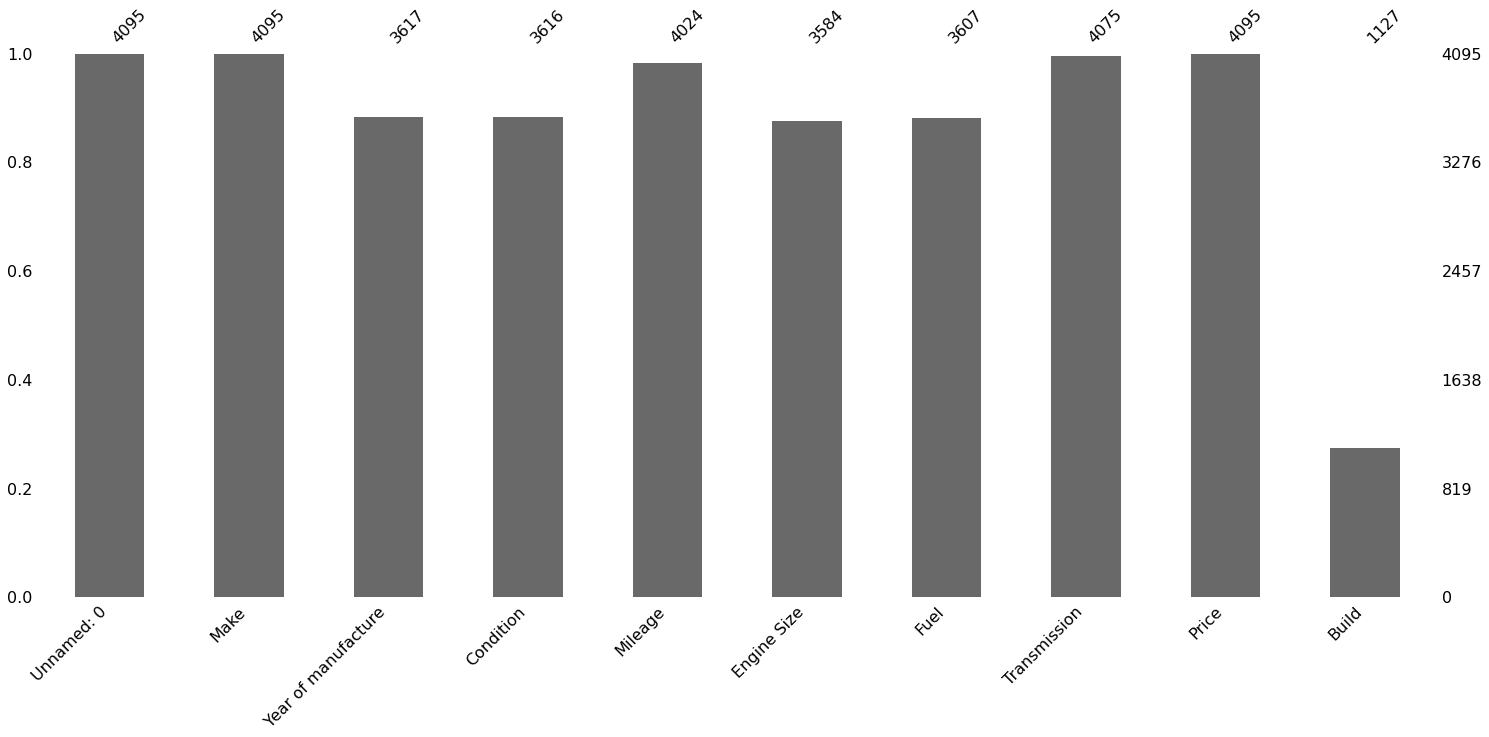

In [5]:
msno.bar(df)

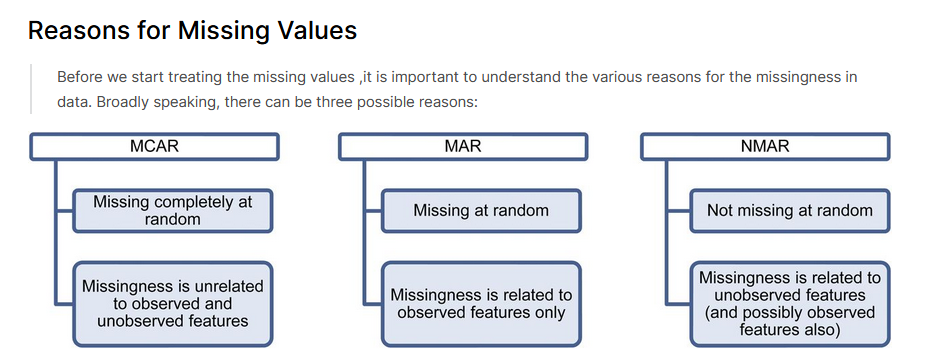


1. Missing Completely at Random (MCAR)

    The missing values on a given variable (Y) are not associated with other variables in a given data set or with the variable (Y) itself. In other words, there is no particular reason for the missing values.

2. Missing at Random (MAR)

    MAR occurs when the missingness is not random, but where missingness can be fully accounted for by variables where there is complete information.

3. Missing Not at Random (MNAR)

    Missingness depends on unobserved data or the value of the missing data itself.


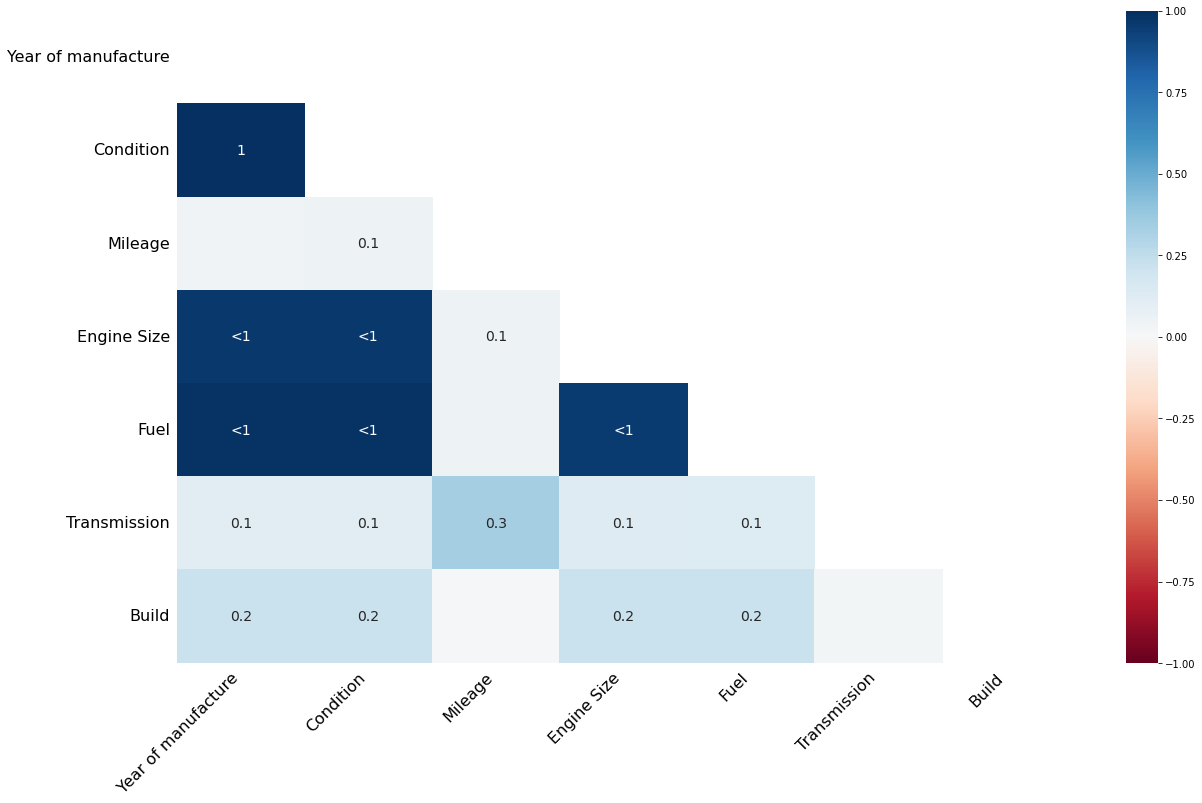

In [6]:
msno.heatmap(df)

In [7]:
tabel = pd.DataFrame({
    "Data Null :" : df.isnull().sum()/len(df) * 100
})

tabel

,Data Null :
Unnamed: 0,0.000000
Make,0.000000
Year of manufacture,11.672772
Condition,11.697192
Mileage,1.733822
Engine Size,12.478632
Fuel,11.916972
Transmission,0.488400
Price,0.000000
Build,72.478632


In [8]:
# Column Build Has 72% missing value (> 50%), we will delete this column
df.drop('Build', axis = 1, inplace = True)

# Treatment for missing value :

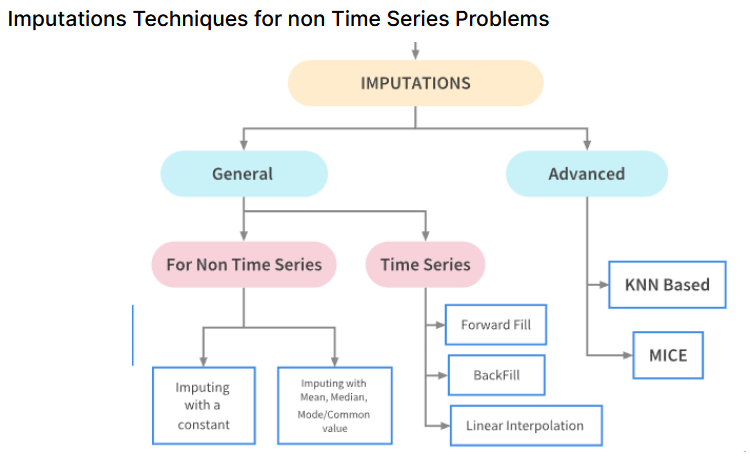


In [9]:
df.isnull().sum()

Unnamed: 0               0
Make                     0
Year of manufacture    478
Condition              479
Mileage                 71
Engine Size            511
Fuel                   488
Transmission            20
Price                    0
dtype: int64

# most_frequent, mean, median for non time series
Handing missing value with most_frequent strategy or usualy we call mode / modulus

In [13]:
from sklearn.impute import SimpleImputer
most_frequent = SimpleImputer(strategy = 'most_frequent') # strategy can also be mean or median 

In [11]:
df[['Transmission', 'Fuel', 'Condition']] = most_frequent.fit_transform(df[['Transmission', 'Fuel', 'Condition']])

In [15]:
df[['Year of manufacture', 'Mileage', 'Engine Size']].corr()

,Year of manufacture,Mileage,Engine Size
Year of manufacture,1.000000,-0.199885,0.010391
Mileage,-0.199885,1.000000,0.001447
Engine Size,0.010391,0.001447,1.000000


# For Time Series we use interpolate

(5.0, 389549.85)

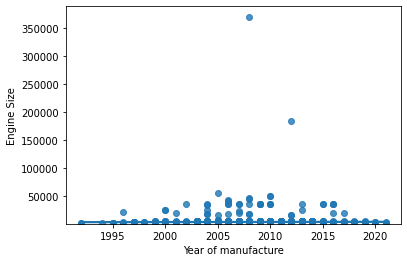

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y = 'Engine Size', x = 'Year of manufacture', data = df)
plt.ylim(5,)

(5.0, 10474852.45)

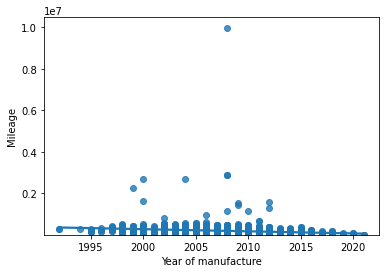

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y = 'Mileage', x = 'Year of manufacture', data = df)
plt.ylim(5,)

(5.0, 10474852.45)

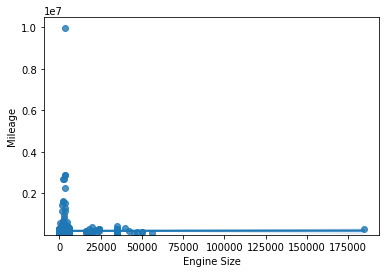

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(y = 'Mileage', x = 'Engine Size', data = df)
plt.ylim(5,)

In [19]:
# Imputation using Linear Interpolation method for Year Manufacture and EngineSize

df['Year of manufacture'].interpolate(limit_direction="both",inplace=True)

In [20]:
df['Engine Size'].interpolate(limit_direction="both",inplace=True)

# Advan Technique 
K-Nearest Neighbor Imputation

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [21]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df['Mileage'] = knn_imputer.fit_transform(df[['Mileage']])

In [23]:
df.isnull().sum()

Unnamed: 0             0
Make                   0
Year of manufacture    0
Condition              0
Mileage                0
Engine Size            0
Fuel                   0
Transmission           0
Price                  0
dtype: int64

# **C O N C L U S I O N** :

There is no single best way to handle missing values. One needs to experiment with different methods and then decide which method is best for a particular problem.